In [15]:
import numpy as np
import matplotlib.pyplot as plt
import math, copy
from lab_utils_common import  plot_data

In [7]:
X = np.array([[0.5, 1.5], [1,1], [1.5, 0.5], [3, 0.5], [2, 2], [1, 2.5]])
y = np.array([0, 0, 0, 1, 1, 1])

In [5]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [18]:
def logistic_loss(X, y, w, b):
    m = X.shape[0]
    loss = np.zeros(m)
    for i in range(m):
        z_i = np.dot(w, X[i]) + b
        f_wb_i = sigmoid(z_i)
        loss[i] = -y[i] * np.log(f_wb_i) - (1-y[i]) * np.log(1-f_wb_i)
    return loss

In [17]:
def logistic_cost(X, y, w, b):
    m = X.shape[0]
    cost = np.sum(logistic_loss(X, y, w, b))
    cost = cost/m
    return cost

In [42]:
w = np.array([0.2, -0.5])
b = -1

loss = logistic_loss(X, y, w, b)
print("Logistic Loss:", loss)

cost = logistic_cost(X, y, w, b)
print(cost)

Logistic Loss: [0.18 0.24 0.33 1.07 1.78 2.17]
0.9614488043163321


In [39]:
# A better value of w and b to reduce the cost
w = np.array([0.83, 1])
b = -2.5

loss = logistic_loss(X, y, w, b)
print("Logistic Loss:", loss)

cost = logistic_cost(X, y, w, b)
print(cost)

Logistic Loss: [0.44 0.41 0.39 0.48 0.27 0.36]
0.3922972957610673


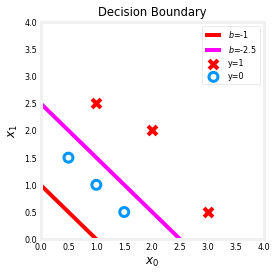

In [43]:
x0 = np.arange(0,6)

# Plot the two decision boundaries
x1 = 1 - x0
x1_other = 2.5 - x0

fig,ax = plt.subplots(1, 1, figsize=(4,4))
# Plot the decision boundary
ax.plot(x0,x1, c='red', label="$b$=-1")
ax.plot(x0,x1_other, c='magenta', label="$b$=-2.5")
ax.axis([0, 4, 0, 4])

# Plot the original data
plot_data(X,y,ax)
ax.axis([0, 4, 0, 4])
ax.set_ylabel('$x_1$', fontsize=12)
ax.set_xlabel('$x_0$', fontsize=12)
plt.legend(loc="upper right")
plt.title("Decision Boundary")
plt.show()

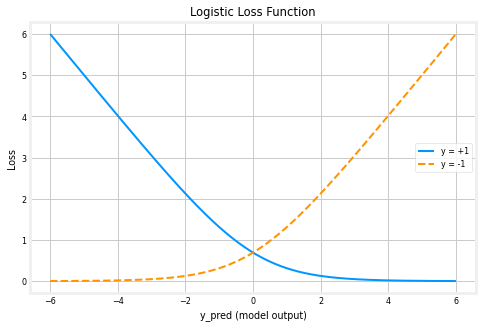

In [56]:
def logistic_loss(y_true, y_pred):
    return np.log(1 + np.exp(-y_true * y_pred))

# Generate data
y_pred = np.linspace(-6, 6, 200)
y_true_pos = np.ones_like(y_pred)
y_true_neg = -np.ones_like(y_pred)

# Compute losses
loss_pos = logistic_loss(y_true_pos, y_pred)
loss_neg = logistic_loss(y_true_neg, y_pred)

# Plot
plt.figure(figsize=(8, 5))
plt.plot(y_pred, loss_pos, label="y = +1", linewidth=2)
plt.plot(y_pred, loss_neg, label="y = -1", linewidth=2, linestyle="--")
plt.title("Logistic Loss Function")
plt.xlabel("y_pred (model output)")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()


In [9]:
def compute_gradient_logistic(X, y, w, b):
    m = X.shape[0]
    n = X.shape[1]
    dj_dw = np.zeros(n)
    dj_db = 0
    
    for i in range(m):
        z_i = np.dot(X[i],w) + b
        f_wb_i = sigmoid(z_i)
        err_i = f_wb_i - y[i]
        for j in range(n):
            dj_dw[j] += err_i * X[i, j]
        dj_db = dj_db + err_i
    dj_dw = dj_dw/m
    dj_db = dj_db/m
    
    return dj_dw, dj_db

In [10]:
X_tmp = np.array([[0.5, 1.5], [1,1], [1.5, 0.5], [3, 0.5], [2, 2], [1, 2.5]])
y_tmp = np.array([0, 0, 0, 1, 1, 1])
w_tmp = np.array([2.,3.])
b_tmp = 1.
dj_dw_tmp, dj_db_tmp = compute_gradient_logistic(X_tmp, y_tmp, w_tmp, b_tmp)
print(f"dj_db: {dj_db_tmp}" )
print(f"dj_dw: {dj_dw_tmp.tolist()}" )

dj_db: 0.49861806546328574
dj_dw: [0.498333393278696, 0.49883942983996693]


In [12]:
def gradient_descent(X, y, w_in, b_in, alpha, iters):
    J_history = []
    w = copy.deepcopy(w_in)
    b = b_in
    
    for i in range(iters):
        dj_dw, dj_db = compute_gradient_logistic(X, y, w, b)
        w = w - alpha * dj_dw
        b = b - alpha * dj_db
        
        J_history.append(logistic_cost(X, y, w, b))
        
        if i % math.ceil(iters / 10) == 0:
            print(f"Iteration {i:4d}: Cost {J_history[-1]}")
    return w, b, J_history

In [19]:
X_train = np.array([[0.5, 1.5], [1,1], [1.5, 0.5], [3, 0.5], [2, 2], [1, 2.5]])
y_train = np.array([0, 0, 0, 1, 1, 1])

w_tmp  = np.zeros_like(X_train[0])
b_tmp  = 0.
alph = 0.1
iters = 10000

w_out, b_out, _ = gradient_descent(X_train, y_train, w_tmp, b_tmp, alph, iters) 
print(f"\nupdated parameters: w:{w_out}, b:{b_out}")

Iteration    0: Cost 0.684610468560574
Iteration 1000: Cost 0.1590977666870456
Iteration 2000: Cost 0.08460064176930081
Iteration 3000: Cost 0.05705327279402531
Iteration 4000: Cost 0.042907594216820076
Iteration 5000: Cost 0.034338477298845684
Iteration 6000: Cost 0.028603798022120097
Iteration 7000: Cost 0.024501569608793
Iteration 8000: Cost 0.02142370332569295
Iteration 9000: Cost 0.019030137124109114

updated parameters: w:[5.28 5.08], b:-14.222409982019837
